In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import os 

In [5]:
df = pd.read_csv('summary_tr01_upd.csv')
df.head()

,cif file,metal atom,total num of metal atoms,total num of hinge bonding,atoms in hinge bonding,total num of double bonding,atoms in double bonding,total num of scissors bonding,atoms in scissors bonding
0,qmof-1a36e21,Zn,4,16,"O[8], N[4], Cl[4]",0.0,None,0,None
1,qmof-9d35285,Zn,16,64,O[64],0.0,None,0,None
2,qmof-a328797,Al,2,0,None,6.0,"O(44)-C(13)-O(47), O(53)-C(16)-O(50), O(45)-C(...",0,None
3,qmof-5e8c015,Ni,3,2,O[2],8.0,"N(155)-C(103)-C(101)-N(153), O(181)-C(137)-O(1...",0,None
4,qmof-1c7dc6d,Pr,4,28,"Cl[12], N[16]",0.0,None,0,None


In [6]:
# Change the number of each bonds 

In [7]:
def length_path(row):
    if row['atoms in double bonding'] == 'None':
        row['length'] = 0
    else:
        temp = row['atoms in double bonding'].split(', ')
        row['length'] = len(temp)
    return row

In [8]:
def length_path2(row):
    if row['atoms in scissors bonding'] == 'None':
        row['length scissors'] = 0
    else:
        temp = row['atoms in scissors bonding'].split(', ')
        row['length scissors'] = len(temp)
    return row

In [9]:
# check total number of double bonds and len of list in atoms in double bonds
# the same for scissors bonds
df = df.apply(length_path ,axis=1)
df = df.apply(length_path2 ,axis=1)

In [10]:
df.head(15)

,cif file,metal atom,total num of metal atoms,total num of hinge bonding,atoms in hinge bonding,total num of double bonding,atoms in double bonding,total num of scissors bonding,atoms in scissors bonding,length,length scissors
0,qmof-1a36e21,Zn,4,16,"O[8], N[4], Cl[4]",0.0,None,0,None,0,0
1,qmof-9d35285,Zn,16,64,O[64],0.0,None,0,None,0,0
2,qmof-a328797,Al,2,0,None,6.0,"O(44)-C(13)-O(47), O(53)-C(16)-O(50), O(45)-C(...",0,None,6,0
3,qmof-5e8c015,Ni,3,2,O[2],8.0,"N(155)-C(103)-C(101)-N(153), O(181)-C(137)-O(1...",0,None,13,0
4,qmof-1c7dc6d,Pr,4,28,"Cl[12], N[16]",0.0,None,0,None,0,0
5,qmof-ef5f46f,Zn,4,8,"N[4], O[4]",8.0,"N(124)-C(84)-C(88)-N(120), O(139)-C(47)-C(67)-...",0,None,8,0
6,qmof-8708a28,Zn,2,4,"N[2], O[2]",3.0,"O(57)-H(5)-O(55)-C(29)-O(53), O(56)-H(4)-O(54)...",0,None,4,0
7,qmof-a7c79f1,Zn,4,8,N[8],8.0,"O(161)-C(129)-O(157), O(160)-C(128)-O(156), O(...",0,None,8,0
8,qmof-683accb,Zn,16,64,O[64],0.0,None,0,None,0,0
9,qmof-87f9fa2,Zn,8,32,O[32],0.0,None,0,None,0,0


In [11]:
# print cases where length is not equal to total number of double bonds
print('Double :',len(df[df['length'] != df['total num of double bonding']]['atoms in double bonding']))
print('Scissors :',len(df[df['length scissors'] != df['total num of scissors bonding']]['atoms in scissors bonding']))


Double : 871
Scissors : 1527


In [12]:
# change total number of double bonds to length 
# the same for scissors bonds
df['total num of double bonding'] = df['length']
df['total num of scissors bonding'] = df['length scissors']
df = df.drop(columns=['length'])
df = df.drop(columns=['length scissors'])

In [13]:
# First, let's filter some cases
# 1) If hinge bonding with H ,Cl, F 
# 2) If double bonding contains H, Cl,F in path
# 3) If scissors bonding contains H, Cl,F in path
# But to do that we need to know the number of bonds with H, Cl, F and so on :(


In [14]:
# df['atoms in hinge bonding'].unique()

In [15]:
# Filtration
# atoms in hinge bonding will be in that template 'O[8], N[4], Cl[4]' where the number is the number of bonds with that atom
# we can use that information to substract number from the data 'total num of hinge bonding'
# So we can use the following code to remove the cases that contain H, Cl, F in the hinge bonding

# Аномальные атомы для исключения
anomaly_atoms = {'H', 'Cl', 'F', 'Br', 'I'}

# Функция для фильтрации атомов в связях "hinge" и корректировки общего числа
def filter_anomalies(row):
    if row['atoms in hinge bonding'] == "None":
        return row
    else:
        atoms_counts = row['atoms in hinge bonding'].split(", ")
        filtered_atoms_counts = []
        total_filtered_bonding = 0

        for atom_count in atoms_counts:
            atom_type, count = atom_count.split("[")
            count = int(count[:-1])  # Удаление закрывающей скобки и преобразование в число
            if atom_type not in anomaly_atoms:
                filtered_atoms_counts.append(f"{atom_type}[{count}]")
                total_filtered_bonding += count

        # Обновление значений в строке DataFrame
        row['total num of hinge bonding'] = total_filtered_bonding
        row['atoms in hinge bonding'] = ", ".join(filtered_atoms_counts)
        return row

def filter_double_bonds(row):
    # Получаем данные о двойных связях
    double_bonds = row.get('atoms in double bonding', '')
    # Проверка на None или пустую строку
    if double_bonds == 'None':
        return row

    # Разделение пути на отдельные связи
    bonds_list = double_bonds.split(", ")
    filtered_bonds = []
    total_filtered_double_bonding = 0

    for bond in bonds_list:
        # Проверка на наличие аномальных атомов в каждом пути
        if not any(anomaly_atom in bond for anomaly_atom in anomaly_atoms):
            filtered_bonds.append(bond)
            total_filtered_double_bonding += 1

    # Обновление значений в строке DataFrame
    row['total num of double bonding'] = total_filtered_double_bonding
    row['atoms in double bonding'] = ", ".join(filtered_bonds)
    return row

def filter_scissors_bonds(row):
    # Получаем данные о двойных связях
    double_bonds = row.get('atoms in scissors bonding', '')
    # Проверка на None или пустую строку
    if double_bonds == 'None':
        return row

    # Разделение пути на отдельные связи
    bonds_list = double_bonds.split(", ")
    filtered_bonds = []
    total_filtered_double_bonding = 0

    for bond in bonds_list:
        # Проверка на наличие аномальных атомов в каждом пути
        if not any(anomaly_atom in bond for anomaly_atom in anomaly_atoms):
            filtered_bonds.append(bond)
            total_filtered_double_bonding += 1

    # Обновление значений в строке DataFrame
    row['total num of scissors bonding'] = total_filtered_double_bonding
    row['atoms in scissors bonding'] = ", ".join(filtered_bonds)
    return row

In [16]:
df.head()

,cif file,metal atom,total num of metal atoms,total num of hinge bonding,atoms in hinge bonding,total num of double bonding,atoms in double bonding,total num of scissors bonding,atoms in scissors bonding
0,qmof-1a36e21,Zn,4,16,"O[8], N[4], Cl[4]",0,None,0,None
1,qmof-9d35285,Zn,16,64,O[64],0,None,0,None
2,qmof-a328797,Al,2,0,None,6,"O(44)-C(13)-O(47), O(53)-C(16)-O(50), O(45)-C(...",0,None
3,qmof-5e8c015,Ni,3,2,O[2],13,"N(155)-C(103)-C(101)-N(153), O(181)-C(137)-O(1...",0,None
4,qmof-1c7dc6d,Pr,4,28,"Cl[12], N[16]",0,None,0,None


In [17]:
df = df.apply(filter_anomalies, axis=1)
df = df.apply(filter_double_bonds, axis=1)
df = df.apply(filter_scissors_bonds, axis=1)

In [18]:
df.head()

,cif file,metal atom,total num of metal atoms,total num of hinge bonding,atoms in hinge bonding,total num of double bonding,atoms in double bonding,total num of scissors bonding,atoms in scissors bonding
0,qmof-1a36e21,Zn,4,12,"O[8], N[4]",0,None,0,None
1,qmof-9d35285,Zn,16,64,O[64],0,None,0,None
2,qmof-a328797,Al,2,0,None,6,"O(44)-C(13)-O(47), O(53)-C(16)-O(50), O(45)-C(...",0,None
3,qmof-5e8c015,Ni,3,2,O[2],9,"N(155)-C(103)-C(101)-N(153), N(155)-C(105)-N(1...",0,None
4,qmof-1c7dc6d,Pr,4,16,N[16],0,None,0,None


In [19]:
# print cif names if 'atoms in hinge bonding' contains one of this atom: H, Cl, F, Br, I
redud_hinge = df[df['atoms in hinge bonding'].str.contains('H|Cl|F|Br|I', na=False)]['cif file'].tolist()
print('Structures with redutant hinge bonds with (H,Cl,Br,F,I):', len(redud_hinge))

# print cif names if 'atoms in hinge bonding' contains one of this atom: H, Cl, F, Br, I
redud_double = df[df['atoms in double bonding'].str.contains('H|Cl|F|Br|I', na=False)]['cif file'].tolist()
print('Structures with redutant double bonds with (H,Cl,Br,F,I):', len(redud_double))

# print cif names if 'atoms in scissors bonding' contains one of this atom: H, Cl, F, Br, I
redud_scissors = df[df['atoms in scissors bonding'].str.contains('H|Cl|F|Br|I', na=False)]['cif file'].tolist()
print('Structures with redutant scissors bonds with (H,Cl,Br,F,I):', len(redud_scissors))

# print cif names if 'atoms in double bonding' contains one of this atom metal atom
metal_unique = df['metal atom'].unique()
metal_in_double = df[df['atoms in double bonding'].str.contains('|'.join(metal_unique), na=False)]['cif file'].tolist()
print('Structures with metal in double bonding:', len(metal_in_double))

Structures with redutant hinge bonds with (H,Cl,Br,F,I): 0
Structures with redutant double bonds with (H,Cl,Br,F,I): 0
Structures with redutant scissors bonds with (H,Cl,Br,F,I): 0
Structures with metal in double bonding: 0


In [20]:
print('Summ all structures with redunant bonds(NOT UNIQUE STRUCTRE):',len(redud_hinge + redud_double + redud_scissors))
print('Unique structures with redutant bonds:',len(set(redud_hinge + redud_double + redud_scissors)))

Summ all structures with redunant bonds(NOT UNIQUE STRUCTRE): 0
Unique structures with redutant bonds: 0


In [21]:
# Now we can filter out the structures with redudant bonds
# 1) Remove the structures with redudant bonds from df 

df_filtered = df[~df['cif file'].isin(set(redud_hinge + redud_double + redud_scissors))].copy()


In [23]:
# df_filtered[(df_filtered['total num of hinge bonding'] == 0) and (df_filtered['total num of double bonding'] != 'None')]

In [24]:
df_filtered[df_filtered['total num of hinge bonding'] == 0].count()

cif file                         804
metal atom                       804
total num of metal atoms         804
total num of hinge bonding       804
atoms in hinge bonding           804
total num of double bonding      804
atoms in double bonding          804
total num of scissors bonding    804
atoms in scissors bonding        804
dtype: int64

In [25]:
print(len(df_filtered))
df_filtered.head()

7461


,cif file,metal atom,total num of metal atoms,total num of hinge bonding,atoms in hinge bonding,total num of double bonding,atoms in double bonding,total num of scissors bonding,atoms in scissors bonding
0,qmof-1a36e21,Zn,4,12,"O[8], N[4]",0,None,0,None
1,qmof-9d35285,Zn,16,64,O[64],0,None,0,None
2,qmof-a328797,Al,2,0,None,6,"O(44)-C(13)-O(47), O(53)-C(16)-O(50), O(45)-C(...",0,None
3,qmof-5e8c015,Ni,3,2,O[2],9,"N(155)-C(103)-C(101)-N(153), N(155)-C(105)-N(1...",0,None
4,qmof-1c7dc6d,Pr,4,16,N[16],0,None,0,None


## Perform analysis with filtreed df,after recomputing the number of bonds with H, Cl, F and so on I will update the code above  

In [26]:
# Take statistics of the filtered structures
df_filtered.describe()

,total num of metal atoms,total num of hinge bonding,total num of double bonding,total num of scissors bonding
count,7461.000000,7461.000000,7461.000000,7461.000000
mean,4.303177,14.303847,1.895724,1.320064
std,3.211328,15.689361,3.475862,3.297852
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,0.000000,0.000000
50%,4.000000,8.000000,0.000000,0.000000
75%,6.000000,20.000000,4.000000,0.000000
max,32.000000,144.000000,40.000000,48.000000


In [27]:
# Take num of unique characteristion of the filtered structures
df_filtered['metal atom'].unique()
print('Number of unique metal atoms:', len(df_filtered['metal atom'].unique()))

Number of unique metal atoms: 55


In [28]:
# df_filtered['atoms in hinge bonding'].unique()


In [29]:
# Take only some structures and map_names
# open all csv and unite them
path = 'C:\\Users\\v.shirobokov\\Documents\\git repo\\PPTiM\\knn data'
df_ges = pd.read_csv(os.path.join(path, 'ges_mol_qmof.csv'))
df_nopred = pd.read_csv(os.path.join(path, 'no_pred_qmof.csv'))
df_tp = pd.read_csv(os.path.join(path, 'T_P_qmof.csv'))



import json
with open('C:\\Users\\v.shirobokov\\Documents\\git repo\\PPTiM\\preprocessing\\qmof\\map_names.json', 'r') as f:
    dict_names = json.load(f)

# Переворачиваем словарь для поиска по значениям
dict_flipped = {v: k for k, v in dict_names.items()}

# Используем apply для применения функции к каждому элементу столбца 'col 1'
# Функция возвращает ключ из перевернутого словаря, если значение найдено, иначе None
keys_in_df_ges = df_ges[df_ges.columns[0]].apply(lambda x: dict_flipped.get(x, None))
keys_in_df_nopred = df_nopred[df_nopred.columns[0]].apply(lambda x: dict_flipped.get(x, None))
keys_in_df_tp = df_tp[df_tp.columns[0]].apply(lambda x: dict_flipped.get(x, None))

# Фильтруем None значения, чтобы получить только совпадения
keys_in_df_ges = keys_in_df_ges.dropna()
keys_in_df_nopred = keys_in_df_nopred.dropna()
keys_in_df_tp = keys_in_df_tp.dropna()

# Переводим в список
keys_in_df_ges = keys_in_df_ges.tolist()
keys_in_df_nopred = keys_in_df_nopred.tolist()
keys_in_df_tp = keys_in_df_tp.tolist()

In [30]:
# Statistics of bonding divided on number of metal atoms 
# Take only TP structures 
df_filtered_tp = df_filtered[df_filtered['cif file'].isin(keys_in_df_tp)].copy()

# divide number of each bonding on number of metal atoms for each row
# 1) Hinge bonding 
df_filtered_tp['morm hinge bond'] = df_filtered_tp['total num of hinge bonding']/ df_filtered_tp['total num of metal atoms']
# 2) Double bonding
df_filtered_tp['morm double bond'] = df_filtered_tp['total num of double bonding']/ df_filtered_tp['total num of metal atoms']
# 3) Scissors bonding
df_filtered_tp['morm scissors bond'] = df_filtered_tp['total num of scissors bonding']/ df_filtered_tp['total num of metal atoms']

# Take statistics of the filtered structures
df_filtered_tp.describe()

,total num of metal atoms,total num of hinge bonding,total num of double bonding,total num of scissors bonding,morm hinge bond,morm double bond,morm scissors bond
count,2444.000000,2444.000000,2444.000000,2444.000000,2444.000000,2444.000000,2444.000000
mean,4.379296,14.807692,1.242226,1.793781,3.134854,0.455991,0.516148
std,3.445583,16.416968,2.778831,3.693434,2.244484,0.954184,0.874042
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,4.000000,10.000000,0.000000,0.000000,4.000000,0.000000,0.000000
75%,6.000000,24.000000,0.000000,4.000000,5.000000,0.000000,1.000000
max,32.000000,128.000000,28.000000,32.000000,8.000000,7.000000,3.000000


In [31]:
# Statistics of bonding divided on number of metal atoms 
# Take only guest mol structures
df_filtered_ges = df_filtered[df_filtered['cif file'].isin(keys_in_df_ges)].copy()

# divide number of each bonding on number of metal atoms for each row
# 1) Hinge bonding
df_filtered_ges['morm hinge bond'] = df_filtered_ges['total num of hinge bonding']/ df_filtered_ges['total num of metal atoms']
# 2) Double bonding
df_filtered_ges['morm double bond'] = df_filtered_ges['total num of double bonding']/ df_filtered_ges['total num of metal atoms']
# 3) Scissors bonding
df_filtered_ges['morm scissors bond'] = df_filtered_ges['total num of scissors bonding']/ df_filtered_ges['total num of metal atoms']

# Take statistics of the filtered structures
df_filtered_ges.describe()

,total num of metal atoms,total num of hinge bonding,total num of double bonding,total num of scissors bonding,morm hinge bond,morm double bond,morm scissors bond
count,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000,739.000000
mean,4.840325,16.550744,1.953992,0.809202,3.249741,0.632127,0.186936
std,3.588063,16.935988,3.246102,2.586209,1.982990,1.009335,0.554685
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,4.000000,12.000000,0.000000,0.000000,3.750000,0.000000,0.000000
75%,6.000000,20.000000,4.000000,0.000000,4.000000,1.000000,0.000000
max,16.000000,96.000000,24.000000,24.000000,8.000000,4.000000,2.000000


In [32]:
# Statistics of bonding divided on number of metal atoms
# Take only no pred structures
df_filtered_nopred = df_filtered[df_filtered['cif file'].isin(keys_in_df_nopred)].copy()

# divide number of each bonding on number of metal atoms for each row
# 1) Hinge bonding
df_filtered_nopred['morm hinge bond'] = df_filtered_nopred['total num of hinge bonding']/ df_filtered_nopred['total num of metal atoms']
# 2) Double bonding
df_filtered_nopred['morm double bond'] = df_filtered_nopred['total num of double bonding']/ df_filtered_nopred['total num of metal atoms']
# 3) Scissors bonding
df_filtered_nopred['morm scissors bond'] = df_filtered_nopred['total num of scissors bonding']/ df_filtered_nopred['total num of metal atoms']

# Take statistics of the filtered structures
df_filtered_nopred.describe()

,total num of metal atoms,total num of hinge bonding,total num of double bonding,total num of scissors bonding,morm hinge bond,morm double bond,morm scissors bond
count,4278.000000,4278.000000,4278.000000,4278.000000,4278.000000,4278.000000,4278.000000
mean,4.166900,13.627863,2.259000,1.137681,3.043265,0.701013,0.312157
std,2.985462,14.981163,3.803602,3.133231,2.118037,1.051743,0.712923
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,4.000000,8.000000,0.000000,0.000000,3.000000,0.000000,0.000000
75%,4.000000,16.000000,4.000000,0.000000,4.000000,1.000000,0.000000
max,32.000000,144.000000,40.000000,48.000000,8.000000,10.000000,2.750000


In [33]:
# Statistics of bonding divided on number of metal atoms 
# for all filtered structures
# 1) Hinge bonding
df_filtered['norm hinge bond'] = df_filtered['total num of hinge bonding']/ df_filtered['total num of metal atoms']
# 2) Double bonding
df_filtered['norm double bond'] = df_filtered['total num of double bonding']/ df_filtered['total num of metal atoms']
# 3) Scissors bonding
df_filtered['norm scissors bond'] = df_filtered['total num of scissors bonding']/ df_filtered['total num of metal atoms']

# Take statistics of the filtered structures
df_filtered.describe()

,total num of metal atoms,total num of hinge bonding,total num of double bonding,total num of scissors bonding,norm hinge bond,norm double bond,norm scissors bond
count,7461.000000,7461.000000,7461.000000,7461.000000,7461.000000,7461.000000,7461.000000
mean,4.303177,14.303847,1.895724,1.320064,3.093718,0.613928,0.366576
std,3.211328,15.689361,3.475862,3.297852,2.148293,1.022589,0.764354
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,4.000000,8.000000,0.000000,0.000000,3.000000,0.000000,0.000000
75%,6.000000,20.000000,4.000000,0.000000,4.000000,1.000000,0.000000
max,32.000000,144.000000,40.000000,48.000000,8.000000,10.000000,3.000000


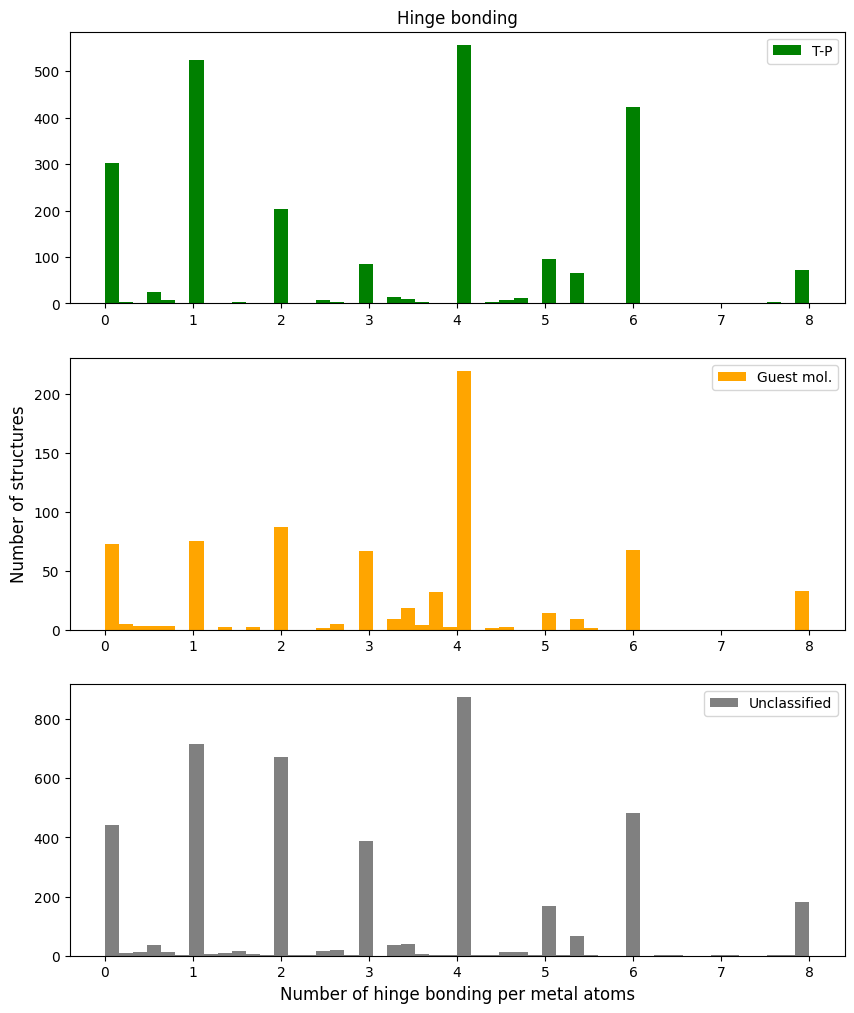

In [35]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

x1, bins, patch = ax1.hist(df_filtered_tp['morm hinge bond'], bins=50, label="T-P", color='green')
ax2.hist(df_filtered_ges['morm hinge bond'], bins=bins, label="Guest mol.", color='orange')
ax3.hist(df_filtered_nopred['morm hinge bond'], bins=50, label="Unclassified", 
                           color='gray')
fig.set_label('Hinge bonding')
ax1.legend()
ax2.legend()
ax3.legend()
ax3.set_xlabel('Number of hinge bonding per metal atoms', fontsize=12)
ax1.set_title('Hinge bonding')

ax2.set_ylabel('Number of structures', fontsize=12)

plt.show()

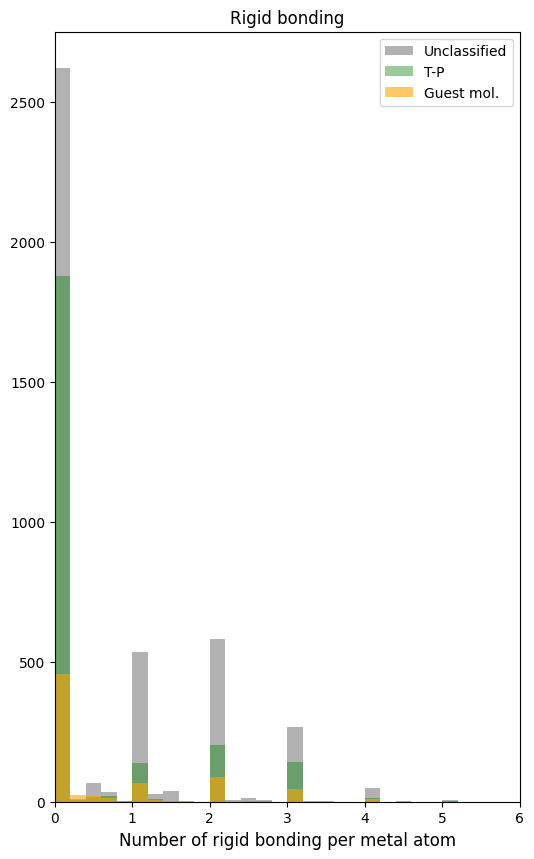

In [36]:
# 2) Double bonding
plt.figure(figsize=(6, 10))
x1 ,bins, patch = plt.hist(df_filtered_nopred['morm double bond'], bins=50, alpha=0.6, label='Unclassified', color='gray')
plt.hist(df_filtered_tp['morm double bond'], bins=bins, alpha=0.4, label='T-P',color='green')
plt.hist(df_filtered_ges['morm double bond'], bins=bins, alpha=0.6, label='Guest mol.', color='orange')
plt.xlim((0,6))
plt.legend(loc='upper right')
plt.title('Rigid bonding')
plt.xlabel('Number of rigid bonding per metal atom', fontsize =12)
plt.show()


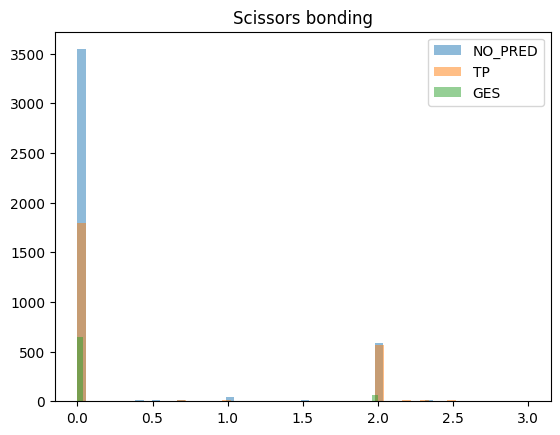

In [37]:
# 3) Scissors bonding
plt.figure()
plt.hist(df_filtered_nopred['morm scissors bond'], bins=50, alpha=0.5, label='NO_PRED')
plt.hist(df_filtered_tp['morm scissors bond'], bins=50, alpha=0.5, label='TP')
plt.hist(df_filtered_ges['morm scissors bond'], bins=50, alpha=0.5, label='GES')

plt.legend(loc='upper right')
plt.title('Scissors bonding')
plt.show()


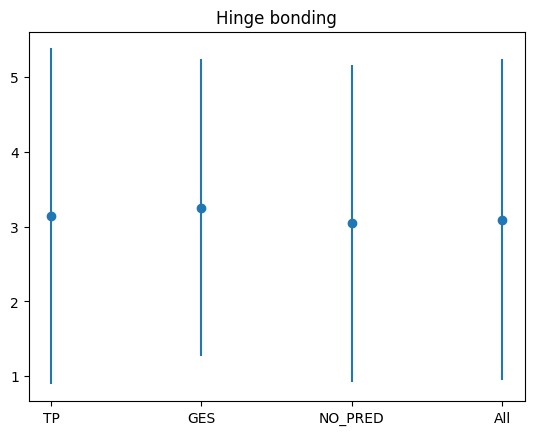

In [38]:
# plot mean and std of the number of each bonding divided on number of metal atoms
# 1) Hinge bonding
plt.figure()
plt.errorbar(['TP', 'GES', 'NO_PRED','All'], [df_filtered_tp['morm hinge bond'].mean(), df_filtered_ges['morm hinge bond'].mean(), df_filtered_nopred['morm hinge bond'].mean(), df_filtered['norm hinge bond'].mean()],
              [df_filtered_tp['morm hinge bond'].std(), df_filtered_ges['morm hinge bond'].std(), df_filtered_nopred['morm hinge bond'].std(),df_filtered['norm hinge bond'].std()], fmt='o')
plt.title('Hinge bonding')
plt.show()

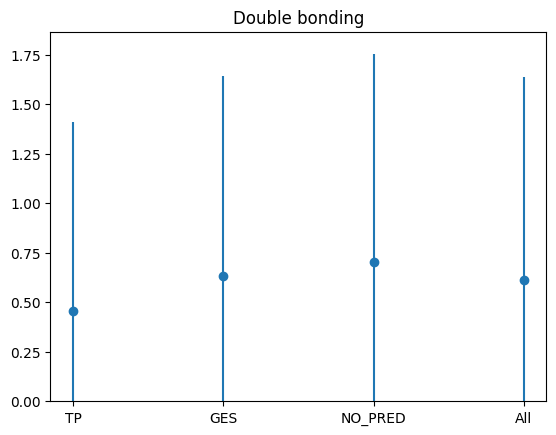

In [39]:
# 2) Double bonding
plt.figure()
plt.errorbar(['TP', 'GES', 'NO_PRED','All'], [df_filtered_tp['morm double bond'].mean(), df_filtered_ges['morm double bond'].mean(), df_filtered_nopred['morm double bond'].mean(), df_filtered['norm double bond'].mean()],
              [df_filtered_tp['morm double bond'].std(), df_filtered_ges['morm double bond'].std(), df_filtered_nopred['morm double bond'].std(),df_filtered['norm double bond'].std()], fmt='o')
plt.ylim(0,)
plt.title('Double bonding')
plt.show()

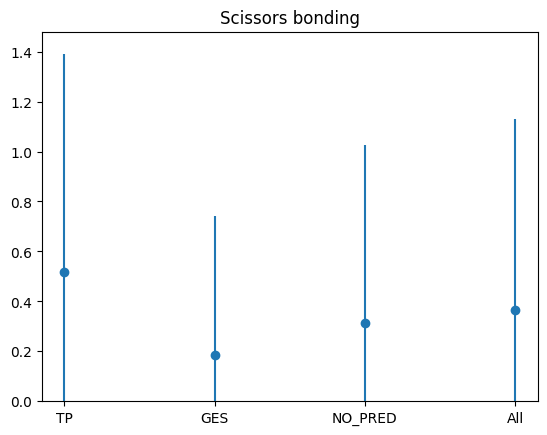

In [40]:
# 3) Scissors bonding (less than 0 is not possible)
plt.figure()
plt.errorbar(['TP', 'GES', 'NO_PRED','All'], [df_filtered_tp['morm scissors bond'].mean(), df_filtered_ges['morm scissors bond'].mean(), df_filtered_nopred['morm scissors bond'].mean(), df_filtered['norm scissors bond'].mean()],
              [df_filtered_tp['morm scissors bond'].std(), df_filtered_ges['morm scissors bond'].std(), df_filtered_nopred['morm scissors bond'].std(),df_filtered['norm scissors bond'].std()], fmt='o')
plt.ylim(0,)
plt.title('Scissors bonding')
plt.show()